In [1]:
import pandas as pd 
import numpy as numpy 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**EDA**

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()    # no missing val.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.shape      # 200 rows , 5 col. 

(200, 5)

In [9]:
data.dropna().shape   # no nan value

(200, 5)

In [10]:
# dropping the customerid as its not needed further
data.drop('CustomerID', axis=1 , inplace =True)

In [11]:
# converting categorical data in 0 , 1 : one hot encoding
# data1 = data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
# data1

In [12]:
data[0:3]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


**Visualizations**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

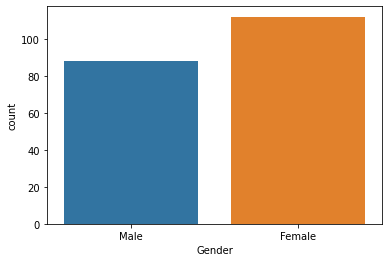

In [13]:
sns.countplot(data.Gender)

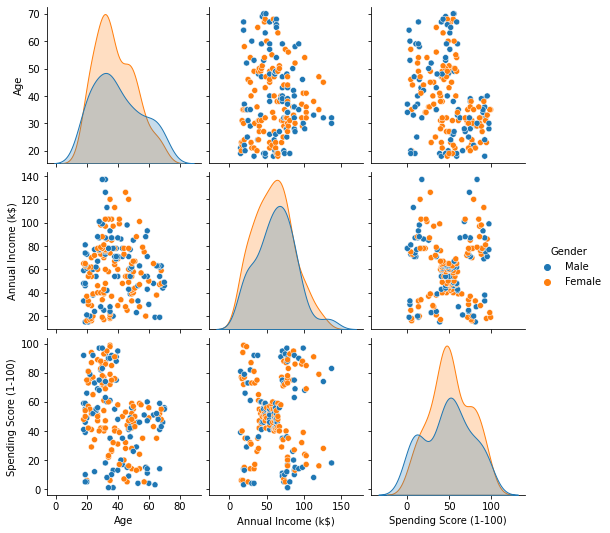

In [16]:
sns.pairplot(data, hue='Gender')

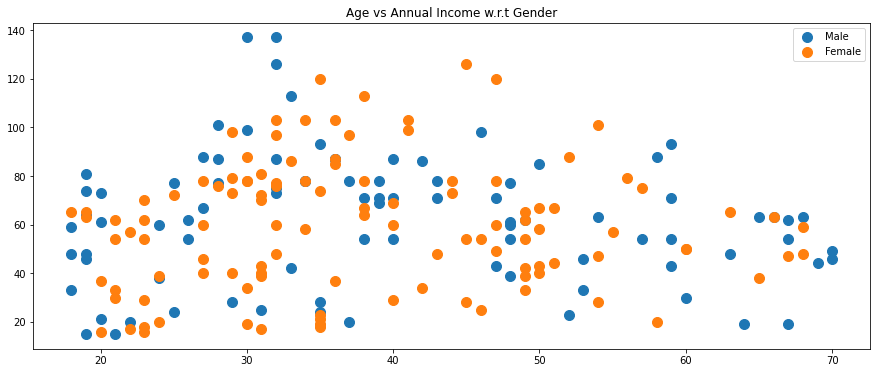

In [36]:
plt.figure(1,figsize=(15,6))
for gender in ['Male', 'Female']:
   plt.scatter(x ='Age' , y='Annual Income (k$)' ,data= data[data['Gender']== gender], s =100
                , label = gender)
   plt.title('Age vs Annual Income w.r.t Gender')
   plt.legend()

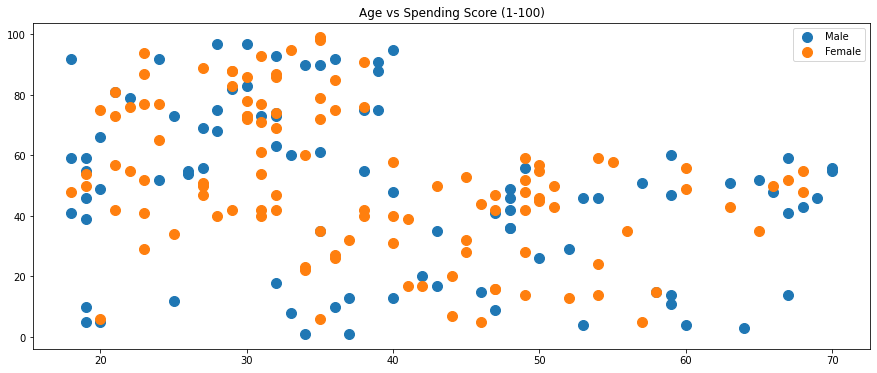

In [23]:
plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Age' , y = 'Spending Score (1-100)' , data=data[data['Gender']== gender],s =100
                , label = gender)
    plt.title('Age vs Spending Score (1-100)')            
    plt.legend()

**Preprocessing**

In [37]:
# normalizing the data 
from sklearn.preprocessing import StandardScaler

In [38]:
# sclicing the data firstly 
data_norm = data.iloc[:,2:]  

In [39]:
data_norm

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [40]:
standardscaler = StandardScaler().fit(data_norm)
standardscaler.transform(data_norm)

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

***Building Algorithm KMeans***

In [41]:
# implementing k means algorithm 
from sklearn.cluster import KMeans

In [42]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Wcss')

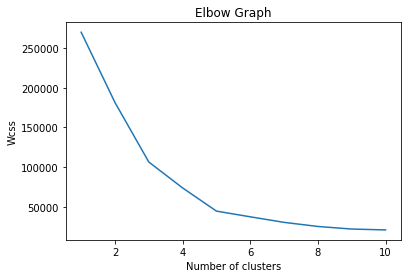

In [43]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')         # best k val can be 4 or 5 

In [44]:
clusters_new = KMeans(n_clusters=5, random_state= 30)
clusters_new.fit(data_norm)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [49]:
data['ClusterID_kmeans']= clusters_new.labels_

In [50]:
# identifying std. values
clusters_new.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [46]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterID_kmeans
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,2
197,Male,32,126,74,3
198,Male,32,137,18,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


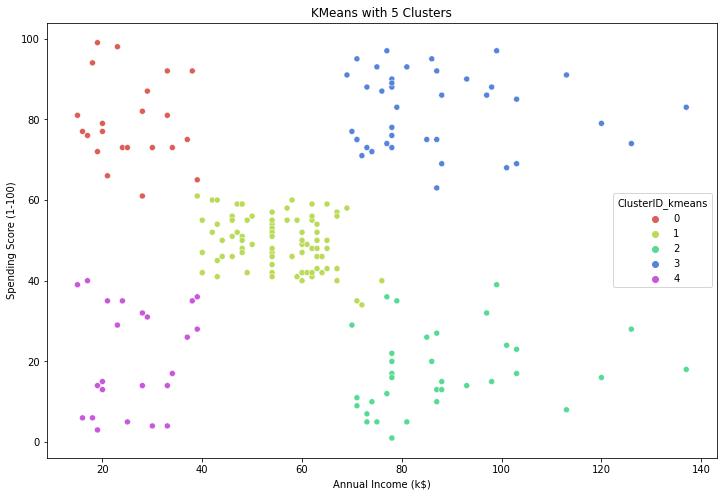

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['ClusterID_kmeans'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

**Building Hierarchy Clustering Algorithm**

In [58]:
# implementing hc algo. 

In [59]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 

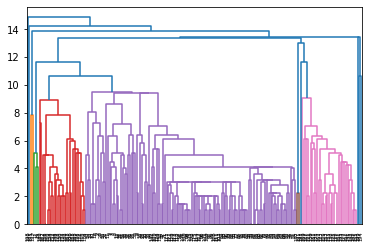

In [60]:
# making dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))  # choosing 4 clusters 

In [76]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')

In [77]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=5)

In [78]:
y_hc=hc.fit_predict(data_norm)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [79]:
clusters= pd.DataFrame(y_hc,columns=['clusters'])

In [80]:
clusters

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
195,4
196,0
197,4
198,3


In [81]:
 data['ClusterID _HC']=clusters

In [82]:
data.drop(['ClusterID_kmeans'], axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterID _HC
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,0
197,Male,32,126,74,4
198,Male,32,137,18,3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


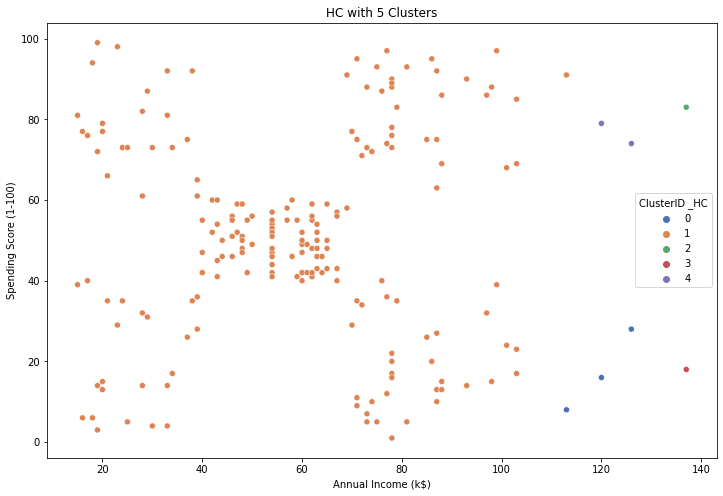

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['ClusterID _HC'], 
                palette=sns.color_palette('deep', 5))
plt.title('HC with 5 Clusters')
plt.show()